# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Muslim Abdul Jabbaar
- **Email:** muhammadmuslimabduljabbaar@gmail.com
- **ID Dicoding:** mmuslimabdulj

## Menentukan Pertanyaan Bisnis

- Analisis perbandingan jumlah peminjaman perbulan antara tahun 2011 dan 2012, apakah ada peningkatan?
- Pada jam berapa peminjaman sepeda tertinggi, kenapa hal tersebut bisa terjadi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Membaca data day.csv

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Membaca data hour.csv

In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Mengecek dataset, apakah ada isi yang null

In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Mengecek apakah ada yang duplikasi pada dataset

In [6]:
day_df.duplicated().sum()

0

In [7]:
hour_df.duplicated().sum()

0

- Menampilkan ringkasan statistik dari dataset

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Menampilkan info dari dataset

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

- Mengubah tipe data kolom 'dteday' menjadi datetime

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

## Exploratory Data Analysis (EDA)

### Explore ...

- Mengeksplor data jumlah peminjaman tiap bulan untuk tiap tahun

In [20]:
day_df['year'] = day_df['dteday'].dt.year

total_rentals_by_month = day_df.groupby(['year', day_df['dteday'].dt.month])['cnt'].sum().reset_index()

print("Jumlah Peminjaman Sepeda per Bulan untuk Masing-Masing Tahun:")
print(total_rentals_by_month)

Jumlah Peminjaman Sepeda per Bulan untuk Masing-Masing Tahun:
    year  dteday     cnt
0   2011       1   38189
1   2011       2   48215
2   2011       3   64045
3   2011       4   94870
4   2011       5  135821
5   2011       6  143512
6   2011       7  141341
7   2011       8  136691
8   2011       9  127418
9   2011      10  123511
10  2011      11  102167
11  2011      12   87323
12  2012       1   96744
13  2012       2  103137
14  2012       3  164875
15  2012       4  174224
16  2012       5  195865
17  2012       6  202830
18  2012       7  203607
19  2012       8  214503
20  2012       9  218573
21  2012      10  198841
22  2012      11  152664
23  2012      12  123713


- Menjumlahkan total pinjaman per tahun

In [14]:
total_rentals_by_year = day_df.groupby('year')['cnt'].sum().reset_index()
print("\nTotal Peminjaman Sepeda per Tahun:")
print(total_rentals_by_year)


Total Peminjaman Sepeda per Tahun:
   year      cnt
0  2011  1243103
1  2012  2049576


- Presentase perkembangan peminjaman dari 2011 ke 2012

In [15]:
print('Presentase perbedaan jumlah peminjaman dari tahun 2011 ke 2012: ')
total_presentation = (total_rentals_by_year['cnt'][1] - total_rentals_by_year['cnt'][0]) / total_rentals_by_year['cnt'][0] * 100
print(total_presentation, '%')

Presentase perbedaan jumlah peminjaman dari tahun 2011 ke 2012: 
64.87579870694545 %


- Menganalisis jumlah peminjaman per jam antara tahun 2011 sampai 2012

In [16]:
total_rentals_by_hour = hour_df.groupby('hr')['cnt'].sum().reset_index()

max_rentals_hour = total_rentals_by_hour['hr'][total_rentals_by_hour['cnt'].idxmax()]

print("\nTotal Jumlah Peminjaman per Jam pada tahun 2011 dan 2012:")
print(total_rentals_by_hour)

print("Peminjaman tertinggi ada pada jam: ", max_rentals_hour.max())


Total Jumlah Peminjaman per Jam pada tahun 2011 dan 2012:
    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941
Peminjaman tertinggi ada pada jam:  17


## Visualization & Explanatory Analysis

### Pertanyaan 1:

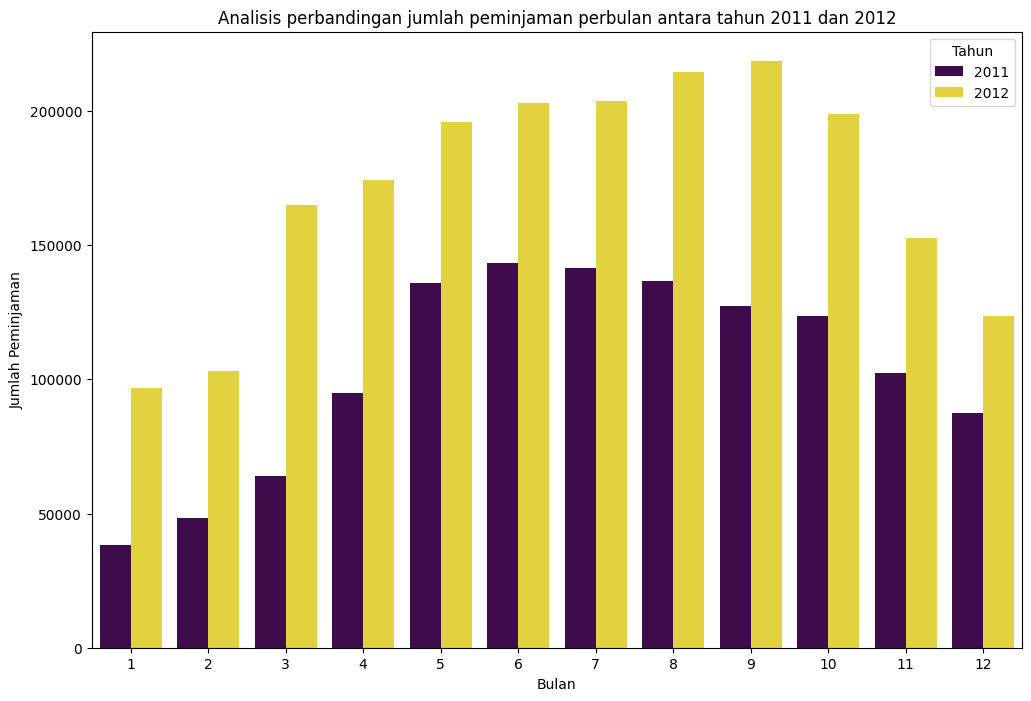

In [17]:
day_df['year'] = day_df['dteday'].dt.year

total_rentals_by_month = day_df.groupby(['year', day_df['dteday'].dt.month])['cnt'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='dteday', y='cnt', hue='year', data=total_rentals_by_month, palette='viridis')
plt.title('Analisis perbandingan jumlah peminjaman perbulan antara tahun 2011 dan 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Tahun', loc='upper right')
plt.show()

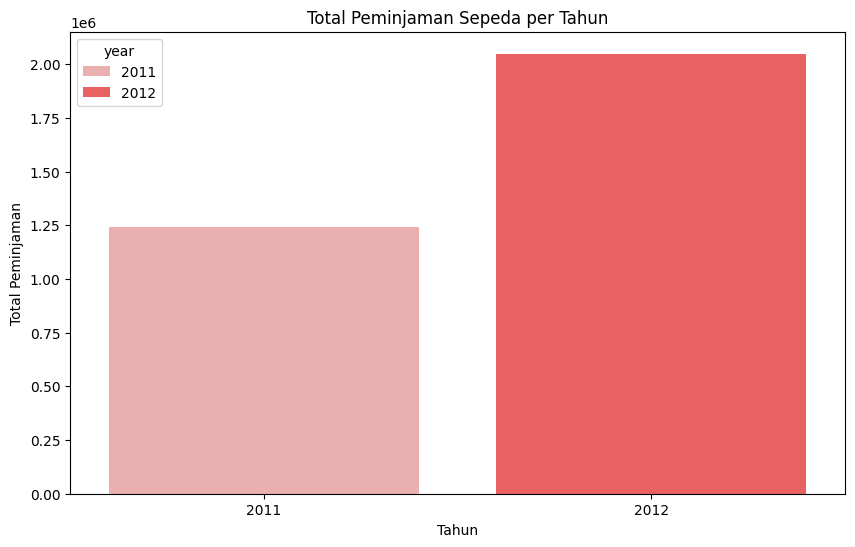

In [18]:
total_rentals_by_year = day_df.groupby('year')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='cnt', hue='year', data=total_rentals_by_year,
            palette={2011: 'lightcoral', 2012: 'red'}, alpha=0.7)
plt.title('Total Peminjaman Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Peminjaman')
plt.show()

### Pertanyaan 2:

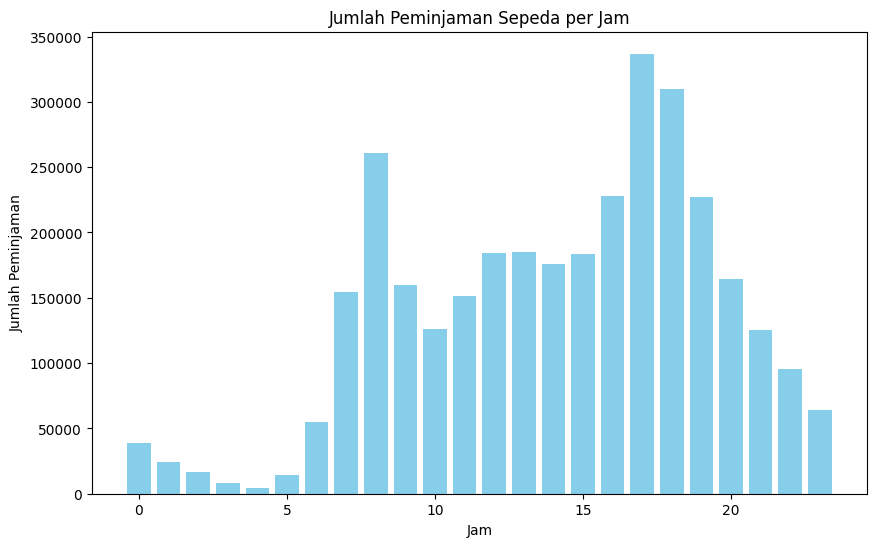

In [19]:
total_rentals_by_hour = hour_df.groupby('hr')['cnt'].sum().reset_index()

max_rentals_hour = total_rentals_by_hour['hr'][total_rentals_by_hour['cnt'].idxmax()]

plt.figure(figsize=(10, 6))
plt.bar(total_rentals_by_hour['hr'], total_rentals_by_hour['cnt'], color='skyblue')
plt.title('Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

## Conclusion

- Kesimpulan dari hasil analisis pertanyaan pertama, bahwa terjadi perkembangan dalam jumlah peminjaman jika dibandingkan jumlah bulanan antara tahun 2011 dan 2012. Yang dimana total peminjaman pada tahun 2011 ada sebanyak 1,243,103, sedangkan pada tahun 2012 sebanyak 2,049,576. Ketertarikan dalam peminjaman sepeda sebagai moda transportasi meningkat hingga 64,8% pada tahun 2012.

- Kesimpulan dari hasil analisis pertanyaan kedua, peminjaman tertinggi terjadi pada jam 17, yang dimana pada jam tersebut adalah jam berakhirnya aktifitas (waktu pulang) bila merunut pada jam kerja universal (9 to 5), dikarenakan selain pada jam 17 (posisi pertama jumlah peminjaman tertinggi) dan 18 (posisi kedua jumlah peminjaman tertinggi), terjadi kenaikkan peminjaman juga pada jam 8 (posisi ketiga jumlah peminjaman tertinggi) yang dimana pada jam tersebut biasanya adalah awal untuk memulai aktifitas.